[*********************100%%**********************]  1 of 1 completed


/workspaces/Carteira-de-Investimentos/venv/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


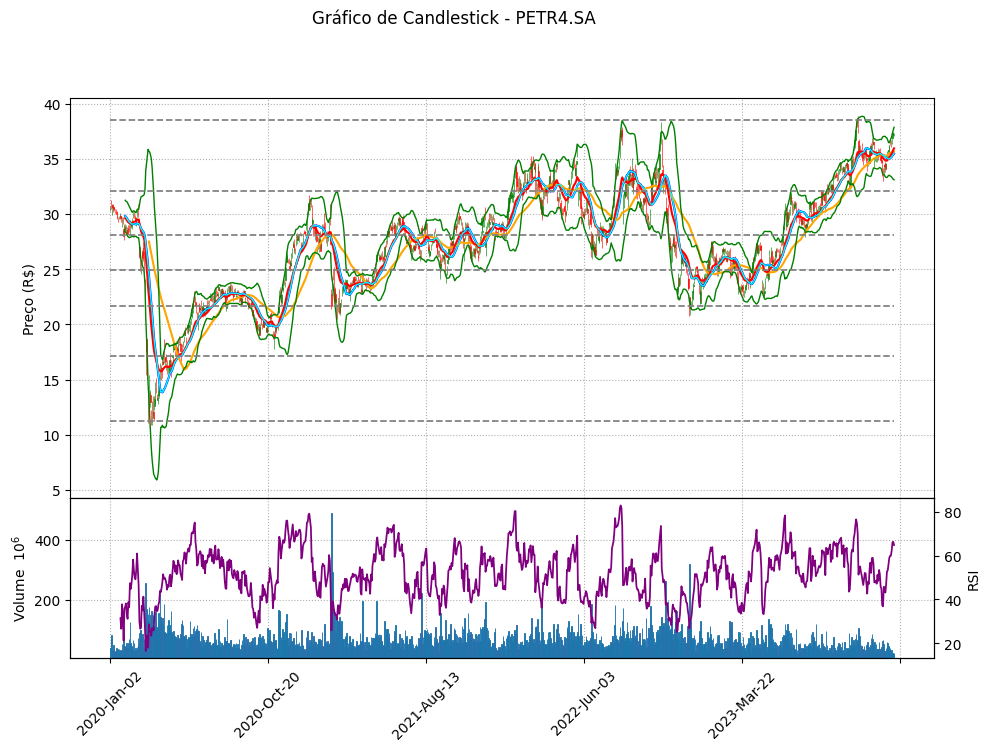

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import ta

# Defina o ticker da ação brasileira (exemplo: Petrobras)
ticker = 'PETR4.SA'

# Baixe os dados de ações
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')

# Verifique se os dados foram baixados com sucesso
if data.empty:
    print(f"Não foi possível obter dados para o ticker {ticker}.")
else:
    # Prepare os dados no formato necessário para o mplfinance
    data.index.name = 'Date'
    data.reset_index(inplace=True)
    data.set_index('Date', inplace=True)
    
    # Calcule as médias móveis, Bollinger Bands e RSI
    data['SMA_20'] = ta.trend.sma_indicator(data['Close'], window=20)
    data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)
    data['EMA_20'] = ta.trend.ema_indicator(data['Close'], window=20)
    data['BB_High'], data['BB_Mid'], data['BB_Low'] = ta.volatility.bollinger_hband(data['Close'], window=20), ta.volatility.bollinger_mavg(data['Close'], window=20), ta.volatility.bollinger_lband(data['Close'], window=20)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)

    # Adicione as retrações de Fibonacci
    max_price = data['Close'].max()
    min_price = data['Close'].min()
    diff = max_price - min_price
    levels = [max_price - diff * r for r in [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]]
    
    # Plotar as retracões de Fibonacci
    fibonacci_lines = [mpf.make_addplot([level] * len(data), color='grey', linestyle='--') for level in levels]
    
    # Criar os gráficos de candlestick com médias móveis e outros indicadores
    addplots = [
        mpf.make_addplot(data['SMA_20'], color='blue', width=1.5, panel=0),
        mpf.make_addplot(data['SMA_50'], color='orange', width=1.5, panel=0),
        mpf.make_addplot(data['EMA_20'], color='red', width=1.5, panel=0),
        mpf.make_addplot(data['BB_High'], color='green', width=1.0, panel=0),
        mpf.make_addplot(data['BB_Mid'], color='cyan', width=1.0, panel=0),
        mpf.make_addplot(data['BB_Low'], color='green', width=1.0, panel=0),
        mpf.make_addplot(data['RSI'], color='purple', panel=1, ylabel='RSI')
    ] + fibonacci_lines
    
    # Configura o estilo do gráfico
    mc = mpf.make_marketcolors(up='g', down='r', edge='i', wick='i', volume='in', inherit=True)
    s = mpf.make_mpf_style(marketcolors=mc, gridstyle=':', y_on_right=False)
    
    # Plotar o gráfico
    mpf.plot(data, type='candle', style=s, title=f'Gráfico de Candlestick - {ticker}', ylabel='Preço (R$)', volume=True, addplot=addplots, figsize=(12, 8))

    plt.show()
